In [1]:
import pandas as pd
import numpy as np

# Getting and exploring our data

In [2]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [3]:
print(fetch_california_housing(as_frame=True).DESCR) # reading some information about the dataset.

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


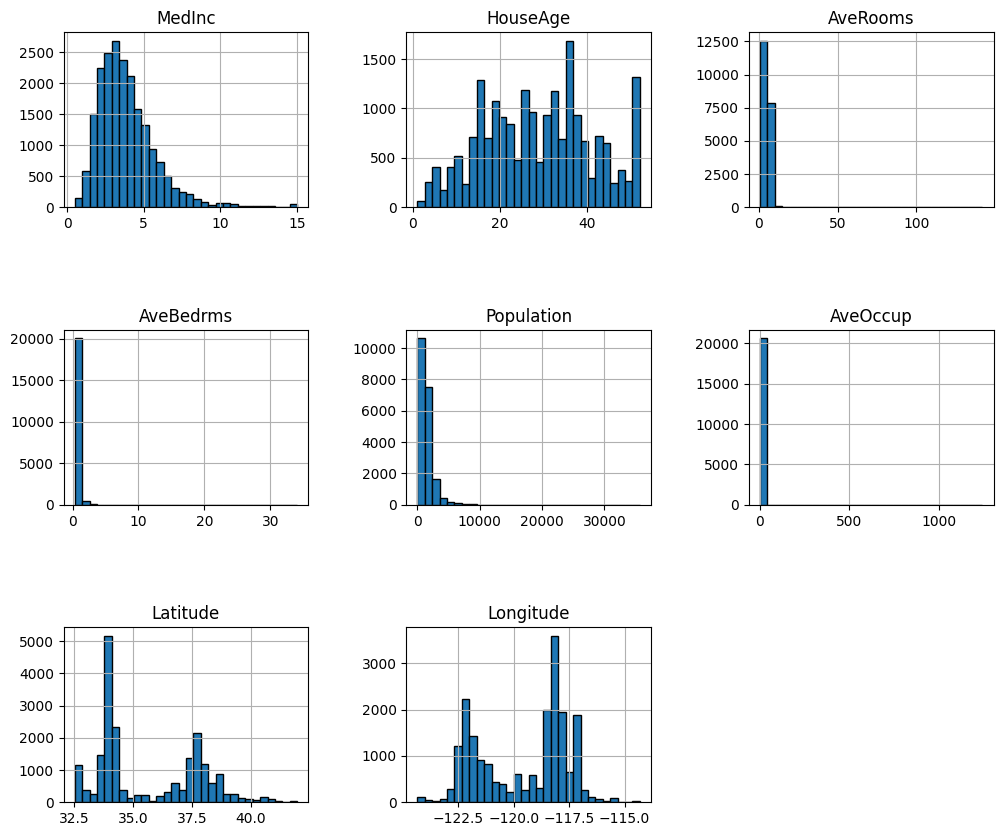

In [51]:
import matplotlib.pyplot as plt

X.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

The AveRoooms, AveBedrms, Population, and AveOccup seem to have outliers. However, as explained in the text at the beginning, this may be due to households such as resorts.

In [9]:
y.isna().sum()

0

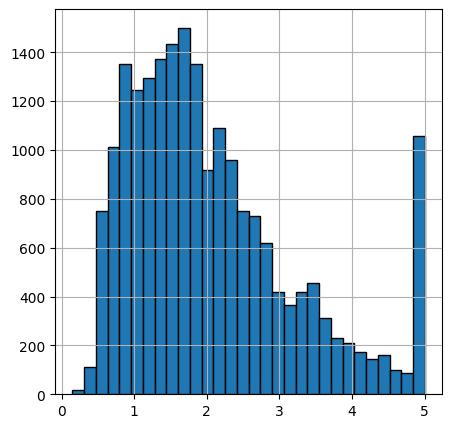

In [10]:
y.hist(figsize=(5, 5), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

We observe that there are no missing values in the dataset.

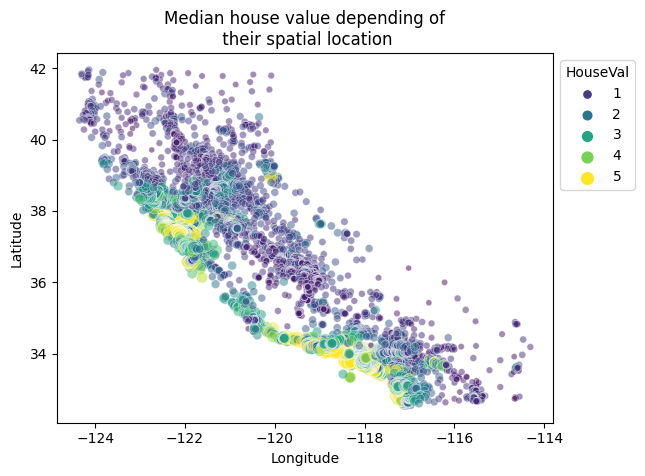

In [11]:
import seaborn as sns

df = X
df['HouseVal'] = y

sns.scatterplot(data=X, x="Longitude", y="Latitude", size="HouseVal", hue="HouseVal", palette="viridis", alpha=0.5)
plt.legend(title="HouseVal", bbox_to_anchor=(1, 1), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In this graph we can visualize that those houses closer to the coast are valuated higher.

In [12]:
# dropping the last column 'HouseVal' that we appended for the heatmap above.
X.drop(['HouseVal'], axis=1, inplace=True)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


<Axes: >

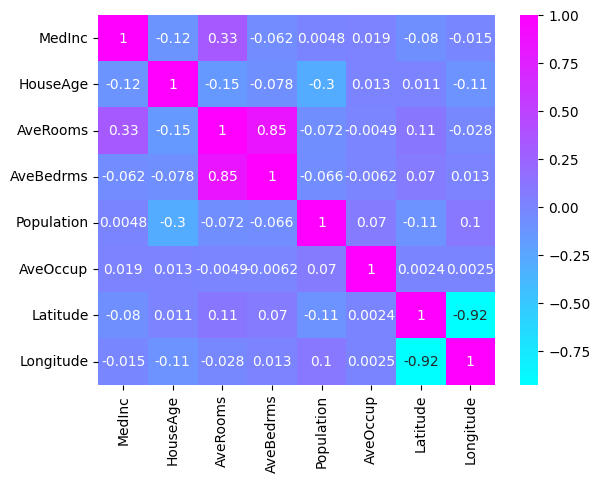

In [13]:
sns.heatmap(df.corr(),cmap='cool',annot=True)

We can see that apart from Longitude and Latitude, no variables are correlated.

Now that we have explored our data, we can start the linear regression analysis. 

# Linear Regression - Without regularization (Simple)

## Scaling

In [14]:
#Perform Scaling on the explanatory variables. It is not needed in the response variable. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [15]:
# looking if the scaling was done correctly
df_scaled = pd.DataFrame(X_sc, columns = X.columns)
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


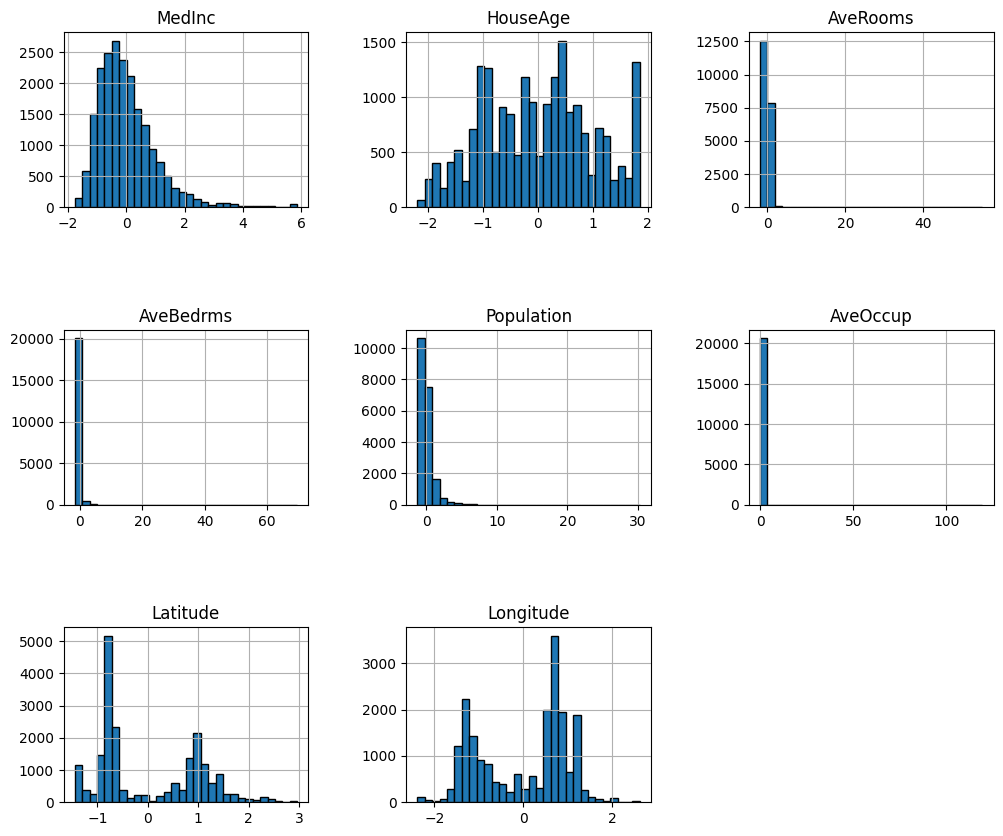

In [16]:
df_scaled.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

These histograms look exactly like the ones plotted before scaling. Therefore, we can see the scaling was done correctly.

## Splitting dataset

In [17]:
#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 8)
(6192, 8)
(14448,)
(6192,)


## Creating model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lin_reg = LinearRegression()

## K-cross validation with K = 5

In [21]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [52]:
scores = cross_val_score(lin_reg, X_train, y_train, cv = 5)
print ('Scores: ', scores, '\nMean Score: ', np.mean(scores), '\nSTD of Scores: ', np.std(scores))

Scores:  [0.64364833 0.60873235 0.61529715 0.55529367 0.61734444] 
Mean Score:  0.6080631892606357 
STD of Scores:  0.028947692431461353


In [53]:
predictions = cross_val_predict(lin_reg, X_test, y_test, cv = 5)
print(predictions)
print(len(predictions))

[2.0449508  1.55086267 2.5150489  ... 0.67760331 2.83845602 3.42626567]
6192


In [54]:
from sklearn import metrics

accuracy = metrics.r2_score(y_test, predictions)
accuracy

0.6173276589022363

## Fitting model

In [55]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [56]:
inter_df = pd.DataFrame(lin_reg.intercept_,index=['INTERCEPT'], columns=['Simple Lin_Reg'])
coeff_df = pd.DataFrame(lin_reg.coef_, index=X.columns, columns=['Simple Lin_Reg'])
df = pd.concat([inter_df,coeff_df.loc[:]])
df

,Simple Lin_Reg
INTERCEPT,2.076512
MedInc,0.845642
HouseAge,0.123563
AveRooms,-0.285062
AveBedrms,0.361898
Population,-0.004854
AveOccup,-0.034125
Latitude,-0.909972
Longitude,-0.881561



- Holding all other features fixed, a 1 unit increase in **MedInc** is associated with an increase of 0.85*$100,000 in the house value.

- Holding all other features fixed, a 1 unit increase in **House Age** is associated with an increase of 0.12*$100,000 in the house value.

- Holding all other features fixed, a 1 unit increase in **HAveRooms** is associated with an increase of -0.31*$100,000 in the house value.

- The rest of the variables can be interpreted in a similar way.

## Predictions from our model

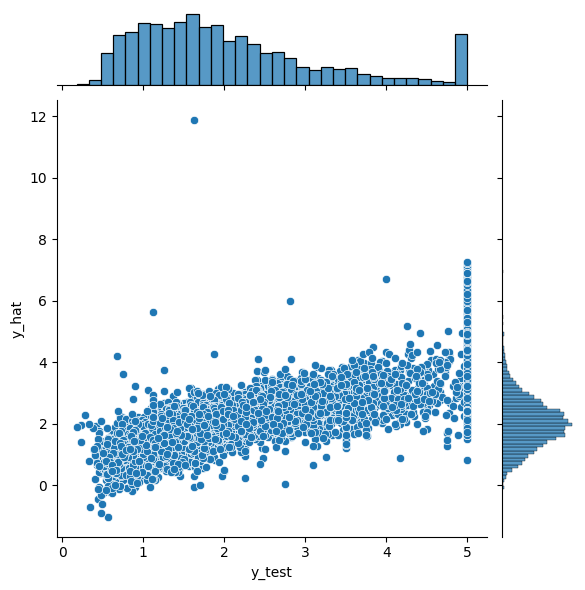

In [57]:
y_hat = lin_reg.predict(X_test)
sns.jointplot(data=pd.DataFrame({'y_test': y_test, 'y_hat': y_hat}), x='y_test', y='y_hat', kind='scatter')

In [58]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, y_hat))
print('MSE:', metrics.mean_squared_error(y_test, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('R-squared:', r2_score(y_test, y_hat))

MAE: 0.5340480856180783
MSE: 0.5362830090921321
RMSE: 0.7323134636835049
R-squared: 0.592890760600554


With an R-squared of about 60%, I would say that our model is not very good to predict the house values.

# Linear Regression with Stochastic Gradient Descent.

In [59]:
from sklearn.linear_model import SGDRegressor
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3)
sgd_reg = SGDRegressor(max_iter=1000, # Epochs.
                       tol=1e-5, # Tolerance. 
                       n_iter_no_change=100, # Stop algorithm if loss drops by less than Tolerance for this amount of epochs. 
                       eta0=0.01, # learning rate.
                       penalty=None)
                       #random_state=42)
sgd_reg.fit(X_train, y_train)

SGDRegressor(n_iter_no_change=100, penalty=None, tol=1e-05)

In [60]:
y_hat_SGD = sgd_reg.predict(X_test)
print("\tExplained variance:", metrics.explained_variance_score(y_test, y_hat_SGD))
print("\tMean absolute error:", metrics.mean_absolute_error(y_test, y_hat_SGD))
print("\tR2 score:", r2_score(y_test, y_hat_SGD))

	Explained variance: 0.6014524934880867
	Mean absolute error: 0.5356201621719736
	R2 score: 0.6014361470972347


In [61]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3)
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [62]:
y_hat_ridge = ridge_reg.predict(X_test)
print("\tExplained variance:", metrics.explained_variance_score(y_test, y_hat_ridge))
print("\tMean absolute error:", metrics.mean_absolute_error(y_test, y_hat_ridge))
print("\tR2 score:", r2_score(y_test, y_hat_ridge))

	Explained variance: 0.6046638941532401
	Mean absolute error: 0.5344920293052686
	R2 score: 0.6046352211193045


In [63]:
from sklearn.linear_model import ElasticNet
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [64]:
y_hat_elastic = elastic_net.predict(X_test)
print("\tExplained variance:", metrics.explained_variance_score(y_test, y_hat_elastic))
print("\tMean absolute error:", metrics.mean_absolute_error(y_test, y_hat_elastic))
print("\tR2 score:", r2_score(y_test, y_hat_elastic))

	Explained variance: 0.5257359363969096
	Mean absolute error: 0.6009468356460234
	R2 score: 0.5257120835202905


## Refining models with GridSearchCV

In [65]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

cv = RepeatedKFold(n_splits=5, n_repeats=3)

### Ridge Regression

In [66]:
# defining possible parameters for Ridge regression.
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

param_ridge = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept':[True, False],
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    }

In [67]:
# defining search
search_ridge = GridSearchCV(Ridge(), param_ridge, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search_ridge.fit(X_train, y_train)

In [68]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.5294332109203481
Best Hyperparameters: {'alpha': 10, 'fit_intercept': True, 'solver': 'sag'}


In [69]:
ridge_reg_adj = Ridge(alpha=10, fit_intercept=True, solver="sag")
ridge_reg_adj.fit(X_train, y_train)

Ridge(alpha=10, solver='sag')

In [70]:
y_hat_ridge_reg_adj = ridge_reg_adj.predict(X_test)
print("\tExplained variance:", metrics.explained_variance_score(y_test, y_hat_ridge_reg_adj))
print("\tMean absolute error:", metrics.mean_absolute_error(y_test, y_hat_ridge_reg_adj))
print("\tR2 score:", r2_score(y_test, y_hat_ridge_reg_adj))

	Explained variance: 0.6000008230666535
	Mean absolute error: 0.5334655953557708
	R2 score: 0.5999921057861184


### Elastic Net

In [71]:
# defining possible parameters for Elastic Net.
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

param_elastic = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept':[True, False],
    'l1_ratio': [0.2, 0.4, 0.6, 0.8]
    }

In [72]:
# defining searh 
search_elastic = GridSearchCV(ElasticNet(), param_elastic, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result_elastic = search_elastic.fit(X_train, y_train)

In [73]:
# summarize result
print('Best Score: %s' % result_elastic.best_score_)
print('Best Hyperparameters: %s' % result_elastic.best_params_)

Best Score: -0.5290569793965887
Best Hyperparameters: {'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 0.2}


In [74]:
elastic_net_adj = ElasticNet(alpha=0.001, fit_intercept=True, l1_ratio=0.2)
elastic_net_adj.fit(X_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.2)

In [75]:
y_hat_elastic_net_adj = elastic_net_adj.predict(X_test)
print("\tExplained variance:", metrics.explained_variance_score(y_test, y_hat_elastic_net_adj))
print("\tMean absolute error:", metrics.mean_absolute_error(y_test, y_hat_elastic_net_adj))
print("\tR2 score:", r2_score(y_test, y_hat_elastic_net_adj))

	Explained variance: 0.6001851705448302
	Mean absolute error: 0.533491869250276
	R2 score: 0.600176504985207


# Model comparison

In [76]:
models = [lin_reg, sgd_reg, ridge_reg, elastic_net, ridge_reg_adj ,elastic_net_adj]

In [77]:
from time import time

for model in models:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_hat = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tMean absolute error:", metrics.mean_absolute_error(y_test, y_hat))
    print("\tR2 score:", r2_score(y_test, y_hat))
    print("-"*60)

LinearRegression()
	Training time: 0.015s
	Prediction time: 0.001s
	Mean absolute error: 0.5335214115300909
	R2 score: 0.5998195818811847
------------------------------------------------------------
SGDRegressor(n_iter_no_change=100, penalty=None, tol=1e-05)
	Training time: 0.465s
	Prediction time: 0.001s
	Mean absolute error: 0.5361933071991034
	R2 score: 0.6047249744349206
------------------------------------------------------------
Ridge(alpha=0.1, solver='cholesky')
	Training time: 0.004s
	Prediction time: 0.010s
	Mean absolute error: 0.5335209654461697
	R2 score: 0.5998216129899201
------------------------------------------------------------
ElasticNet(alpha=0.1)
	Training time: 0.005s
	Prediction time: 0.002s
	Mean absolute error: 0.6009468356460234
	R2 score: 0.5257120835202905
------------------------------------------------------------
Ridge(alpha=10, solver='sag')
	Training time: 0.154s
	Prediction time: 0.001s
	Mean absolute error: 0.5334646998783459
	R2 score: 0.59999453853

# Conclusion

From the results above I can conclude that all models returned similar R-squared values. SGDRegressor without penalty and Ridge with penalty were the ones that took longer. I believe that if we had worked with a larger dataset, the times would have varied more.